# Star Wars Survey

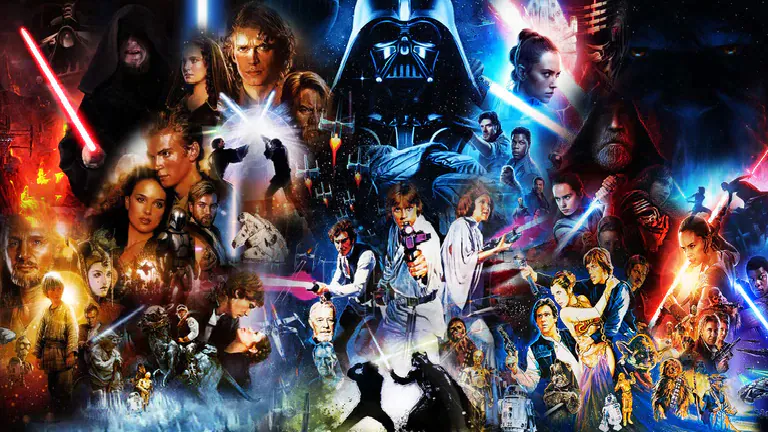

## Introduction 

In this project we will work with and analyse the data collected by the team at __[FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/)__ who collected it by running a survey among Star Wars fans. They received 1186 responses in total. The data can be found from the their __[Git Hub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)__.

Here we will attempt to shed the light on some interesting data re Star Wars episodes, characters, fans and provide answers to some important questions, including __['Who shot first, Han or Greedo?'](https://www.quora.com/Who-shot-first-Greedo-or-Han-Solo)__

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
import numpy as np

# installing custome fonts
font_path = ['/Users/nicko/Google Drive/Dataquest - Python/Guided projects/Guided Project Star Wars Survey/']
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

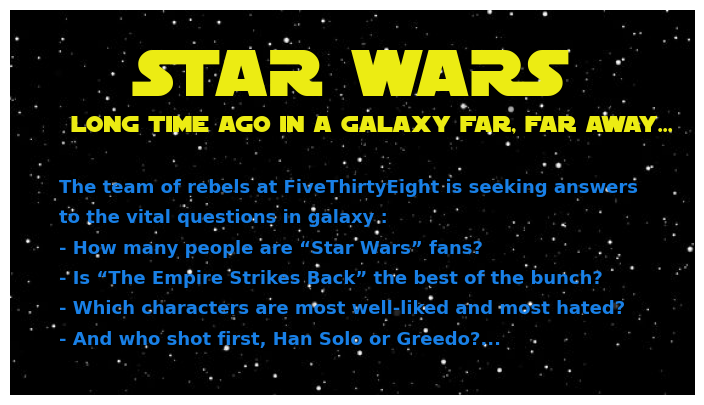

In [2]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.imshow(plt.imread('Background picture.jpg'))

fig.suptitle('STAR WARS', fontfamily='SF Distant Galaxy', fontsize=50, color = '#ecec13', y =0.80, x =0.51)
plt.text(s='Long time ago in a galaxy far, far away…',fontfamily='SF Distant Galaxy', fontsize=17, color = '#ecec13', y =100, x =50)
plt.text(s='The team of rebels at FiveThirtyEight is seeking answers', fontsize=13, weight='bold', color = '#1980e6', y =150, x =40)
plt.text(s='to the vital questions in galaxy :',fontsize=13, weight='bold', color = '#1980e6', y =175, x=40)
plt.text(s='- How many people are “Star Wars” fans?', fontsize=13, weight='bold', color = '#1980e6', y =200, x=40)
plt.text(s='- Is “The Empire Strikes Back” the best of the bunch?', fontsize=13, weight='bold', color = '#1980e6', y =225, x=40)
plt.text(s='- Which characters are most well-liked and most hated? ', fontsize=13, weight='bold', color = '#1980e6', y =250, x=40)
plt.text(s='- And who shot first, Han Solo or Greedo?...', fontsize=13, weight='bold', color = '#1980e6', y =275, x=40)


plt.axis('off') # disabling all axes lines, ticks and labels
plt.show()

In [3]:
# creating title figures
def episode(title):
    fig, ax = plt.subplots(figsize = (15, 1))
    ax.imshow(plt.imread('Background wide.jpg'))
    fig.suptitle(title, fontfamily='SF Distant Galaxy', fontsize=20, color = '#ecec13', y =0.6, x =0.51)
    plt.axis('off')
    return ax

<function matplotlib.pyplot.show(close=None, block=None)>

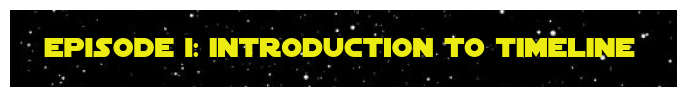

In [4]:
episode('Episode I: Introduction to timeline')
plt.show

The main Star Wars film series is a trilogy of trilogies; as it neared completion, Disney began to refer to it as the "Skywalker Saga".It was released beginning with the original trilogy (Episodes IV, V and VI, 1977–1983), followed by the prequel trilogy (Episodes I, II and III, 1999–2005) and the sequel trilogy (Episodes VII, VIII and IX, 2015–2019).The first film released, Star Wars (1977), is the fourth film chronologically and was later subtitled Episode IV – A New Hope. The saga begins chronologically with Star Wars: Episode I – The Phantom Menace (1999) and concludes with Episode IX – The Rise of Skywalker (2019).

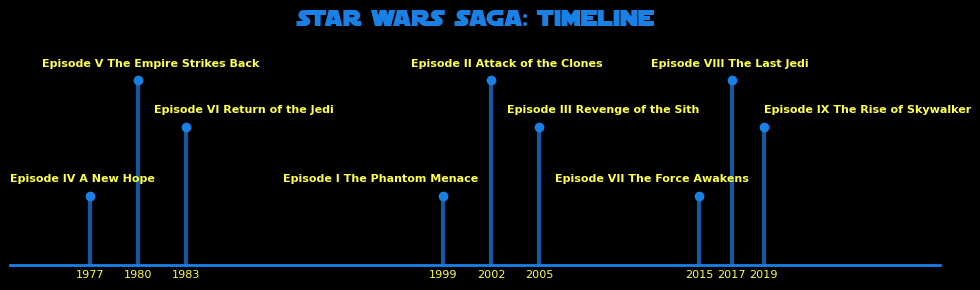

In [5]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 3))

# Creating a dictionary of episodes as keys and years as values.
episodes = {'Episode IV A New Hope': 1977,
            'Episode V The Empire Strikes Back': 1980,
            'Episode VI Return of the Jedi': 1983,
            'Episode I The Phantom Menace': 1999,
            'Episode II Attack of the Clones': 2002,
            'Episode III Revenge of the Sith': 2005,
            'Episode VII The Force Awakens': 2015,
            'Episode VIII The Last Jedi': 2017,
            'Episode IX The Rise of Skywalker': 2019}
list_2 = [1.5,4,3,1.5,4,3, 1.5,4,3] # y axis coordinates

plt.scatter(list(episodes.values()), list_2, color = '#1980e6')

dates = [1972, 1974, 1981, 1989, 1997, 2003, 2006, 2012, 2019] # lists providing coordinates for annotations
numb = [1.8,4.3,3.3,1.8,4.3,3.3,1.8,4.3,3.3]
for i in range(9):
       ax.annotate(text = list(episodes)[i], xytext=(dates[i], numb[i]), xy=(dates[i], numb[i]),
                   color='#ffff4d', weight='heavy', size=8)

ax.vlines(x=list(episodes.values()), ymin=0, ymax=list_2, color='#1980e6', alpha=0.7, linewidth=3)
ax.set_xticks([1977, 1980, 1983, 1999, 2002, 2005, 2015, 2017, 2019])
ax.tick_params(axis='x', colors='#ffff4d', length = 0, labelsize = 8)
ax.set_yticks([])

plt.ylim(0,5)
plt.xlim(1972, 2030)
plt.tick_params(left = False)

ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set(color = '#1980e6', linewidth = 2)

plt.title('Star Wars Saga: Timeline', fontfamily='SF Distant Galaxy', color = '#1980e6', fontsize=17)
plt.show()

The survey conducted by FiveThirtyEight took place before sequel trilogy was released. Hence, for the purpose of this project we will be working only with the first six episoded of the saga: 
original trilogy (Episodes IV, V and VI, 1977–1983) and prequel trilogy (Episodes I, II and III, 1999–2005)

<function matplotlib.pyplot.show(close=None, block=None)>

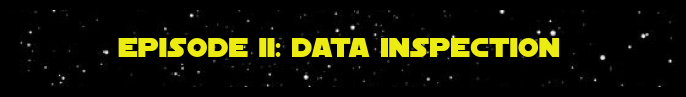

In [6]:
episode('Episode II: Data Inspection')
plt.show

In [7]:
star_wars = pd.read_csv('Star_Wars_Data.csv', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None) # sets the value to display maximum columns
display(star_wars.head())
star_wars.shape # Inspecting the dataframe

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


(1187, 38)

In [8]:
# reviewing the columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [9]:
#reviewing first row
star_wars.iloc[0, :]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

Upon inspection of the first row we can see it does not contain any responses, however it has additional information which can help us to decipher unnamed columns. 

Questions 3-8 are designed to provide an answer if respondents saw any of the first six episodes of Star Wars. Below is a list of question and episodes related to it:

'Which of the following Star Wars films have you seen? Please select all that apply.' - 'Star Wars: Episode I The Phantom Menace',
- ‘Unnamed 4’ - 'Star Wars: Episode II Attack of the Clones',
- ‘Unnamed 5’ - 'Star Wars: Episode III Revenge of the Sith',
- ‘Unnamed 6’ - 'Star Wars: Episode IV A New Hope',
- ‘Unnamed 7’ - 'Star Wars: Episode V The Empire Strikes Back',
- ‘Unnamed 8’ - 'Star Wars: Episode VI Return of the Jedi'

The following 6 questions represent the ranking of each of the six episodes by the respondents. The ranking order starts from the least to the most favourite, 1 being the most favourite and 6 being least favourite.

- ‘Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' - 'Star Wars: Episode I The Phantom Menace',
- ‘Unnamed 10’ - 'Star Wars: Episode II Attack of the Clones',
- ‘Unnamed 11’ - 'Star Wars: Episode III Revenge of the Sith',
- ‘Unnamed 12 - 'Star Wars: Episode IV A New Hope',
- ‘Unnamed 13’ - 'Star Wars: Episode V The Empire Strikes Back',
- ‘Unnamed 14’ - 'Star Wars: Episode VI Return of the Jedi'

Lastly, there are columns related to favourite characters of the saga. 

Using this information we should rename the above columns to something more intuitive. 

In [10]:
new_column_names = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'episode_I',
                    'Unnamed: 4': 'episode_II', 
                    'Unnamed: 5': 'episode_III', 
                    'Unnamed: 6': 'episode_IV',
                    'Unnamed: 7': 'episode_V', 
                    'Unnamed: 8': 'episode_VI',
                    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'episode_I_ranking',
                    'Unnamed: 10': 'episode_II_ranking', 
                    'Unnamed: 11': 'episode_III_ranking', 
                    'Unnamed: 12': 'episode_IV_ranking',
                    'Unnamed: 13': 'episode_V_ranking', 
                    'Unnamed: 14': 'episode_VI_ranking', 
                    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han_Solo', 
                    'Unnamed: 16': 'Luke_Skywalker', 
                    'Unnamed: 17': 'Princess_Leia_Organa',
                    'Unnamed: 18': 'Anakin_Skywalker',
                    'Unnamed: 19': 'Obi_Wan_Kenobi', 
                    'Unnamed: 20': 'Emperor_Palpatine', 
                    'Unnamed: 21': 'Darth_Vader',
                    'Unnamed: 22': 'Lando_Calrissian',
                    'Unnamed: 23': 'Boba_Fett',
                    'Unnamed: 24': 'C3P0',
                    'Unnamed: 25': 'R2_D2',
                    'Unnamed: 26': 'Jar_Jar_Binks', 
                    'Unnamed: 27': 'Padme_Amidala',
                    'Unnamed: 28': 'Yoda'}
star_wars = star_wars.rename(columns = new_column_names)
star_wars.head() # reviewing results

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_I,episode_II,episode_III,episode_IV,episode_V,episode_VI,episode_I_ranking,episode_II_ranking,episode_III_ranking,episode_IV_ranking,episode_V_ranking,episode_VI_ranking,Han_Solo,Luke_Skywalker,Princess_Leia_Organa,Anakin_Skywalker,Obi_Wan_Kenobi,Emperor_Palpatine,Darth_Vader,Lando_Calrissian,Boba_Fett,C3P0,R2_D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [11]:
# dropping not needed anymore column
star_wars = star_wars.drop([0]) 
star_wars.shape

(1186, 38)

<function matplotlib.pyplot.show(close=None, block=None)>

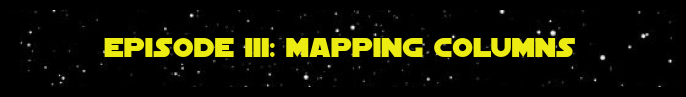

In [12]:
episode('Episode III: Mapping Columns')
plt.show

Let’s explore couple of columns further.

In [13]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [14]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In case of the above columns where the answers are mainly Yes/No, we should convert the responses into Booleans so it will be easier to analyse the data. It is easier to work with Booleans, because we can select the answers without a need  to do a string comparison. 

In [15]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'].map(
    {'Yes': True, 'No': False})

In [16]:
# verifying results
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [17]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'].map(
    {'Yes': True, 'No': False})

In [18]:
# verifying results once again
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [19]:
star_wars['episode_I'].value_counts(dropna = False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: episode_I, dtype: int64

The questions which are related to a particular episode,contain two possible answers: the name of the episode itself and NaN. We assume that the name of the episodes in the answer means that respondents saw it and NaN is either they did not see it or did not answer. We assume that respondents did not see it.

We'll need to convert each of these columns to a Boolean answers.

In [20]:
answers = {'Star Wars: Episode I  The Phantom Menace': True, 'Star Wars: Episode II  Attack of the Clones': True,
          'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True, 
          'Star Wars: Episode V The Empire Strikes Back': True, 'Star Wars: Episode VI Return of the Jedi': True,
          np.NaN: False}
for x in star_wars.columns[3:9]:
    star_wars[x] = star_wars[x].map(answers)

In [21]:
# verifying results
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_I,episode_II,episode_III,episode_IV,episode_V,episode_VI,episode_I_ranking,episode_II_ranking,episode_III_ranking,episode_IV_ranking,episode_V_ranking,episode_VI_ranking,Han_Solo,Luke_Skywalker,Princess_Leia_Organa,Anakin_Skywalker,Obi_Wan_Kenobi,Emperor_Palpatine,Darth_Vader,Lando_Calrissian,Boba_Fett,C3P0,R2_D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


For convenience let's rename the column which identify respondents by fans or not into something more intuitive. 

In [22]:
star_wars = star_wars.rename(columns = {
    'Do you consider yourself to be a fan of the Star Wars film franchise?':'Fans'})
star_wars.columns[2] # verifying results

'Fans'

<function matplotlib.pyplot.show(close=None, block=None)>

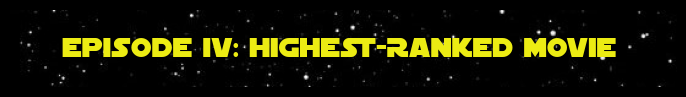

In [23]:
episode('Episode IV: Highest-Ranked Movie')
plt.show

Now we can find the highest-ranked movie. To do this, we should calculate the mean of each ranking columns and project results on the bar chart.

As a reminder that the ranking order starts from the least to the most favourite: 1 being the most favourite and 6 being least favourite.

In [24]:
star_wars[star_wars.columns[9:15]].dtypes

episode_I_ranking      object
episode_II_ranking     object
episode_III_ranking    object
episode_IV_ranking     object
episode_V_ranking      object
episode_VI_ranking     object
dtype: object

Upon inspection we can see that the values in ranking columns are strings, thus they need to be converted into floats.

In [25]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

In [26]:
# verifying results
star_wars[star_wars.columns[9:15]].dtypes

episode_I_ranking      float64
episode_II_ranking     float64
episode_III_ranking    float64
episode_IV_ranking     float64
episode_V_ranking      float64
episode_VI_ranking     float64
dtype: object

In [27]:
overall_mean = star_wars[star_wars.columns[9:15]].mean(numeric_only=True)
overall_mean

episode_I_ranking      3.732934
episode_II_ranking     4.087321
episode_III_ranking    4.341317
episode_IV_ranking     3.272727
episode_V_ranking      2.513158
episode_VI_ranking     3.047847
dtype: float64

Now, let's calculate the same mean for respondents who identify themselves as fans of the saga. 

In [28]:
fans = star_wars[star_wars['Fans'] == True].copy()
fans_mean = fans[fans.columns[9:15]].mean(numeric_only=True)
fans_mean

episode_I_ranking      4.141304
episode_II_ranking     4.342391
episode_III_ranking    4.417423
episode_IV_ranking     2.932971
episode_V_ranking      2.333333
episode_VI_ranking     2.829710
dtype: float64

Let's assume that to be considered a true fan one should have seen all episodes of the saga, rather than simply identify him/herself as a fan. Let's separate the data for those respondents who consider themselves fans, as well as have seen ALL the episodes and calculate their mean.

In [29]:
grouped = fans.groupby(['episode_I', 'episode_II', 'episode_III', 'episode_IV', 'episode_V', 'episode_VI'])
true_fans = grouped.get_group((True, True, True, True, True, True)).copy()
display(true_fans[true_fans.columns[2:9]].value_counts(dropna = False))
true_fans[true_fans.columns[9:15]].mean()

Fans  episode_I  episode_II  episode_III  episode_IV  episode_V  episode_VI
True  True       True        True         True        True       True          411
dtype: int64

episode_I_ranking      4.347932
episode_II_ranking     4.408759
episode_III_ranking    4.285366
episode_IV_ranking     2.749392
episode_V_ranking      2.340633
episode_VI_ranking     2.863747
dtype: float64

Lastly, we will calculate the mean for respondents who DO NOT identify as fans of Star Wars. 

In [30]:
not_fans = star_wars[star_wars['Fans'] == False].copy()

In [31]:
not_fans_mean = not_fans[not_fans.columns[9:15]].mean()
not_fans_mean

episode_I_ranking      2.936396
episode_II_ranking     3.591549
episode_III_ranking    4.193662
episode_IV_ranking     3.933099
episode_V_ranking      2.862676
episode_VI_ranking     3.471831
dtype: float64

Lets plot the results on the chart. 

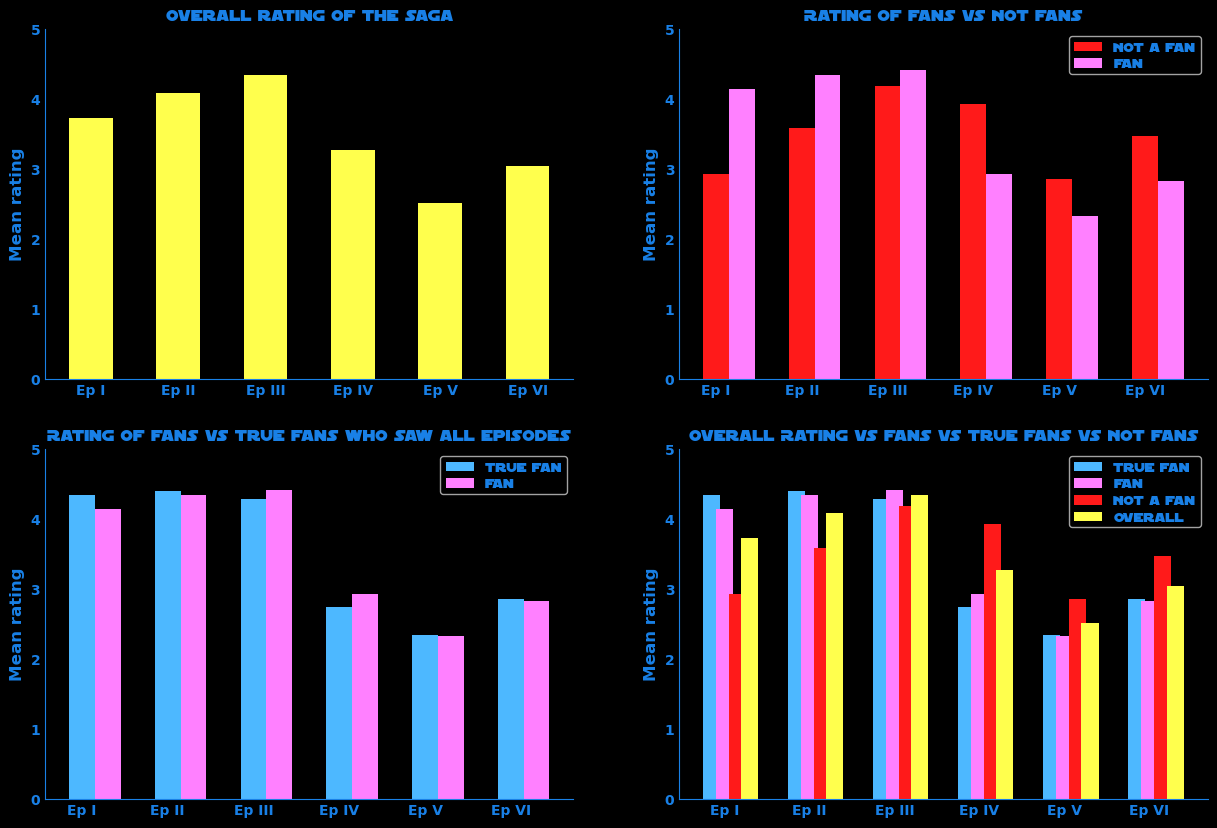

In [32]:
%matplotlib inline

plt.figure(figsize=(15,10))
plt.style.use('dark_background')
width = 0.3
r = np.arange(6)

ax = plt.subplot(2,2,2)
plt.bar(r, not_fans[not_fans.columns[9:15]].mean(), width = width,  color = '#ff1a1a', label = 'Not a Fan')
plt.bar(r +.3, fans[fans.columns[9:15]].mean(), width = width, color = '#ff80ff', label = 'Fan')
plt.legend(prop = 'SF Distant Galaxy', labelcolor='#1980e6')
plt.title('Rating of Fans vs Not Fans', fontfamily='SF Distant Galaxy', fontsize=12, color = '#1980e6')
plt.xticks(ticks = [0,1,2,3,4,5],labels =['Ep I','Ep II','Ep III','Ep IV','Ep V','Ep VI'], weight='bold')
plt.xticks(color = '#1980e6')
plt.yticks(color = '#1980e6', weight='bold')
plt.tick_params(axis='both', which='both',length=0)
plt.ylim(0,5)
ax.set_ylabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')

ax = plt.subplot(2,2,1)
plt.bar(r, star_wars[star_wars.columns[9:15]].mean(), width = 0.5, color = '#ffff4d', label = 'Overall')
plt.title('Overall rating of the saga', fontfamily='SF Distant Galaxy', fontsize=12, color = '#1980e6')
plt.xticks(ticks = [0,1,2,3,4,5],labels =['Ep I','Ep II','Ep III','Ep IV','Ep V','Ep VI'], weight='bold')
plt.xticks(color = '#1980e6')
plt.yticks(color = '#1980e6', weight='bold')
plt.tick_params(axis='both', which='both',length=0)
plt.ylim(0,5)
ax.set_ylabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')

ax = plt.subplot(2,2,3)
plt.bar(r, true_fans[true_fans.columns[9:15]].mean(), width = width,  color = '#4db8ff', label = 'True Fan')
plt.bar(r +.3, fans[fans.columns[9:15]].mean(), width = width, color = '#ff80ff', label = 'Fan')
plt.legend(prop = 'SF Distant Galaxy', labelcolor='#1980e6')
plt.title('Rating of fans vs true fans who saw all episodes', fontfamily='SF Distant Galaxy', fontsize=12, color = '#1980e6')
plt.xticks(ticks = [0,1,2,3,4,5],labels =['Ep I','Ep II','Ep III','Ep IV','Ep V','Ep VI'], weight='bold')
plt.xticks(color = '#1980e6')
plt.yticks(color = '#1980e6', weight='bold')
plt.tick_params(axis='both', which='both',length=0)
plt.ylim(0,5)
ax.set_ylabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')

ax = plt.subplot(2,2,4)
plt.bar(r-.15, true_fans[true_fans.columns[9:15]].mean(), width = 0.2,  color = '#4db8ff', label = 'True Fan')
plt.bar(r, fans[fans.columns[9:15]].mean(), width = 0.2, color = '#ff80ff', label = 'Fan')
plt.bar(r+.15, not_fans[not_fans.columns[9:15]].mean(), width = 0.2,  color = '#ff1a1a', label = 'Not a Fan')
plt.bar(r+.3, star_wars[star_wars.columns[9:15]].mean(), width = 0.2, color = '#ffff4d', label = 'Overall')
plt.legend(prop = 'SF Distant Galaxy', labelcolor='#1980e6')
plt.title('Overall Rating vs Fans vs True Fans vs Not Fans',fontfamily='SF Distant Galaxy', fontsize=12, color = '#1980e6')
plt.xticks(ticks = [0,1,2,3,4,5],labels =['Ep I','Ep II','Ep III','Ep IV','Ep V','Ep VI'], weight='bold')
plt.xticks(color = '#1980e6')
plt.yticks(color = '#1980e6', weight='bold')
plt.tick_params(axis='both', which='both',length=0)
plt.ylim(0,5)
ax.set_ylabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')

plt.show()

As we can see, by far the most popular movie by all respondents (the lowest in the chart) is the Episode V: The Empire Strikes Back. It is the second of the original trilogy, made by George Lucas in 1980. 
<br>The original trilogy (Episodes IV, V & VI) is more popular than the prequel trilogy (Episodes I, II & III). This is true among the both sets of fans of the saga as well (those who saw all the episodes and those who did not, but still consider themselves as fans). 
However, the respondents who do not consider themselves as fans have mixed preferences among all the episodes.  

<function matplotlib.pyplot.show(close=None, block=None)>

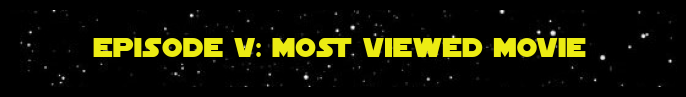

In [33]:
episode('Episode V: Most Viewed Movie')
plt.show

We can figure out how many people have seen each movie by taking the sum of the ‘seen’ columns and projecting the data on a chart.

In [34]:
star_wars[star_wars.columns[3:9]].sum()

episode_I      673
episode_II     571
episode_III    550
episode_IV     607
episode_V      758
episode_VI     738
dtype: int64

In [35]:
fans[fans.columns[3:9]].sum()

episode_I      500
episode_II     463
episode_III    450
episode_IV     483
episode_V      538
episode_VI     537
dtype: int64

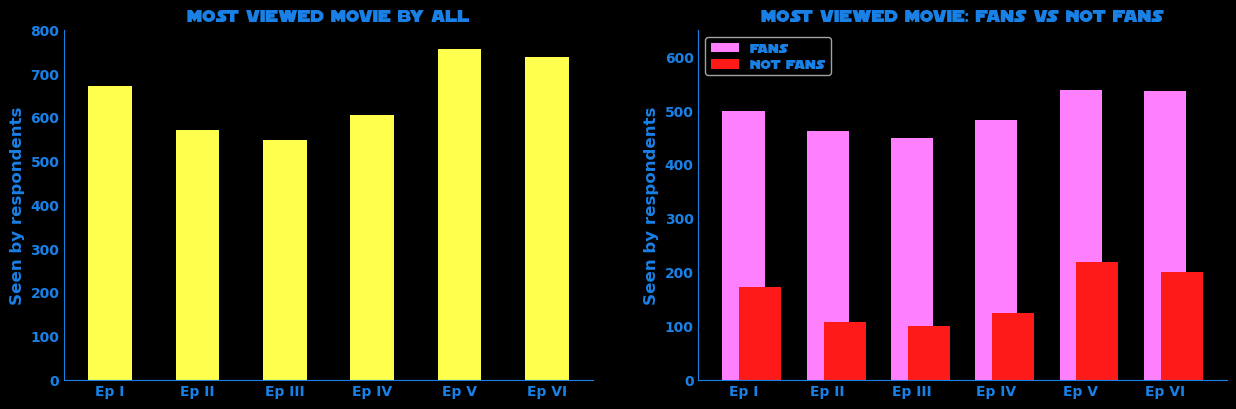

In [36]:
plt.figure(figsize=(15,10))
r = np.arange(6)
width = 0.3

ax = plt.subplot(2,2,1)
plt.bar(r,star_wars[star_wars.columns[3:9]].sum(), width = 0.5, color = '#ffff4d', label = 'Overall')
plt.style.use('dark_background')
plt.xticks(ticks = [0,1,2,3,4,5],labels =['Ep I','Ep II','Ep III','Ep IV','Ep V','Ep VI'], weight='bold')
plt.xticks(color = '#1980e6')
plt.yticks(color = '#1980e6', weight='bold')
plt.ylim(0, 800)
ax.set_ylabel('Seen by respondents', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
ax.tick_params(axis='both', which='both',length=0)
plt.title('Most Viewed Movie by all', fontfamily='SF Distant Galaxy', fontsize=13, color = '#1980e6')

ax = plt.subplot(2,2,2)
plt.bar(r,fans[fans.columns[3:9]].sum(), width = 0.5, color = '#ff80ff', label = 'Fans')
plt.bar(r+.2,not_fans[not_fans.columns[3:9]].sum(), width = 0.5, color = '#ff1a1a', label = 'Not Fans')
plt.style.use('dark_background')
plt.xticks(ticks = [0,1,2,3,4,5],labels =['Ep I','Ep II','Ep III','Ep IV','Ep V','Ep VI'], weight='bold')
plt.xticks(color = '#1980e6')
plt.yticks(color = '#1980e6', weight='bold')
plt.ylim(0,650)
ax.set_ylabel('Seen by respondents', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
ax.tick_params(axis='both', which='both',length=0)
plt.title('Most Viewed Movie: Fans vs Not Fans', fontfamily='SF Distant Galaxy', fontsize=13, color = '#1980e6')
plt.legend(loc = 2, prop = 'SF Distant Galaxy', labelcolor='#1980e6')

plt.show()

The results coincide with the previous chart. As well as highest ranked, Episode V: The Empire Strikes Back is also the most seen movie. 

Interesting observation, despite of the first three episodes being the newest ones (1999-2055) at the time the survey was taken (2014), they are least viewed (with little exception to Episode I being above Episode IV).

<function matplotlib.pyplot.show(close=None, block=None)>

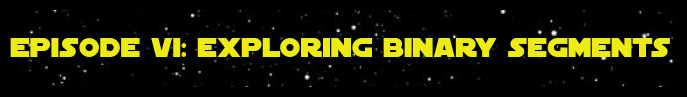

In [37]:
episode('Episode VI: Exploring Binary Segments')
plt.show

Let's explore binary segments like gender, fan base, attitude towards Star Trek. 

In [38]:
star_wars['Fans'].value_counts()

True     552
False    284
Name: Fans, dtype: int64

In [39]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

In [40]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [41]:
star_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes'].copy()
star_trek_fans['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

Let's plot the above results on pie charts. 

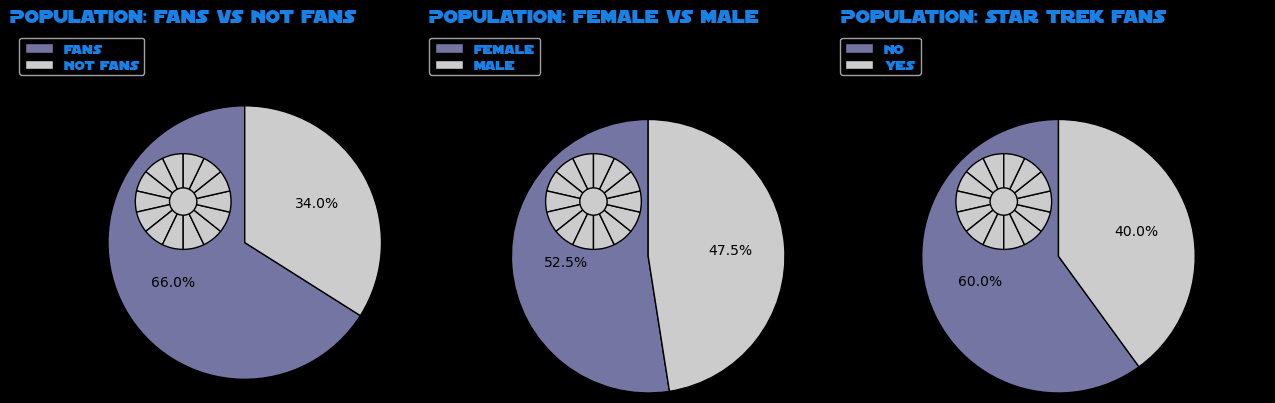

In [42]:
plt.figure(figsize=(15,10))
colors = ['#7575a3', '#cccccc']

ax = plt.subplot(1,3,1)
values = list(star_wars['Fans'].value_counts())
plt.pie(values,  autopct='%1.1f%%', startangle=90, labeldistance=1.42, colors = colors, center=(-.5,.2), wedgeprops={'edgecolor' :'black'},
       textprops={'color':"black"}, labels=['Fans', 'Not Fans'])
plt.legend(prop = 'SF Distant Galaxy', loc = 2, labelcolor='#1980e6')
death_star_core = [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
plt.pie(death_star_core,radius=0.35,startangle=90, wedgeprops={'edgecolor' :'black', 'fc':'#cccccc'},center=(-.95,.5))
death_star = plt.Circle((-.95,.5),0.1,ec='black', fc='#cccccc')
fig = plt.gcf()
fig.gca().add_artist(death_star)
plt.title('Population: Fans vs Not Fans', fontfamily='SF Distant Galaxy', fontsize=14, color = '#1980e6')

ax = plt.subplot(1,3,2)
values = list(star_wars['Gender'].value_counts())
plt.pie(values,  autopct='%1.1f%%', startangle=90, labeldistance=1.42, colors = colors, center=(-.5,.2), wedgeprops={'edgecolor' :'black'},
       textprops={'color':"black"}, labels=['Female', 'Male'])
plt.legend(prop = 'SF Distant Galaxy', loc = 2, labelcolor='#1980e6')
death_star_core = [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
plt.pie(death_star_core,radius=0.35,startangle=90, wedgeprops={'edgecolor' :'black', 'fc':'#cccccc'},center=(-.9,.6))
death_star = plt.Circle((-.9,.6),0.1,ec='black', fc='#cccccc')
fig = plt.gcf()
fig.gca().add_artist(death_star)
plt.title('Population: Female vs Male', fontfamily='SF Distant Galaxy', fontsize=14, color = '#1980e6')

ax = plt.subplot(1,3,3)
values = list(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
plt.pie(values,  autopct='%1.1f%%', startangle=90, labeldistance=1.42, colors = colors, center=(-.5,.2), wedgeprops={'edgecolor' :'black'},
       textprops={'color':"black"}, labels=['No', 'Yes'])
plt.legend(prop = 'SF Distant Galaxy', loc = 2, labelcolor='#1980e6')
death_star_core = [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
plt.pie(death_star_core,radius=0.35,startangle=90, wedgeprops={'edgecolor' :'black', 'fc':'#cccccc'},center=(-.9,.6))
death_star = plt.Circle((-.9,.6),0.1,ec='black', fc='#cccccc')
fig = plt.gcf()
fig.gca().add_artist(death_star)
plt.title('Population: Star Trek fans', fontfamily='SF Distant Galaxy', fontsize=14, color = '#1980e6')

plt.show()

Approximately 2/3 of the respondents identify themselves as fans, which was expected. The distribution by sex insignificant. Interesting observation: 60% of respondents do not favour Star Trek, despite the two franchises having much in common.

<function matplotlib.pyplot.show(close=None, block=None)>

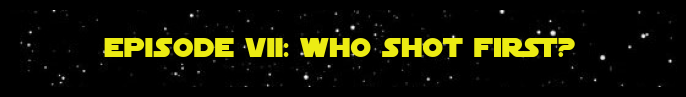

In [43]:
episode('Episode VII: Who shot first?')
plt.show

The question 'Who shot first, Han Solo or Greedo?' refers to a controversial change made to a scene in the film Star Wars (1977),in which Han Solo (Harrison Ford) is confronted by the bounty hunter Greedo (Paul Blake/Maria De Aragon) in the Mos Eisley cantina. There has been a huge __[discussion](https://www.quora.com/Who-shot-first-Greedo-or-Han-Solo)__ among the fans and commentators, as many of them oppose the change. 

Let's see how the respondents answer this question and plot the results on pie charts. 

In [44]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

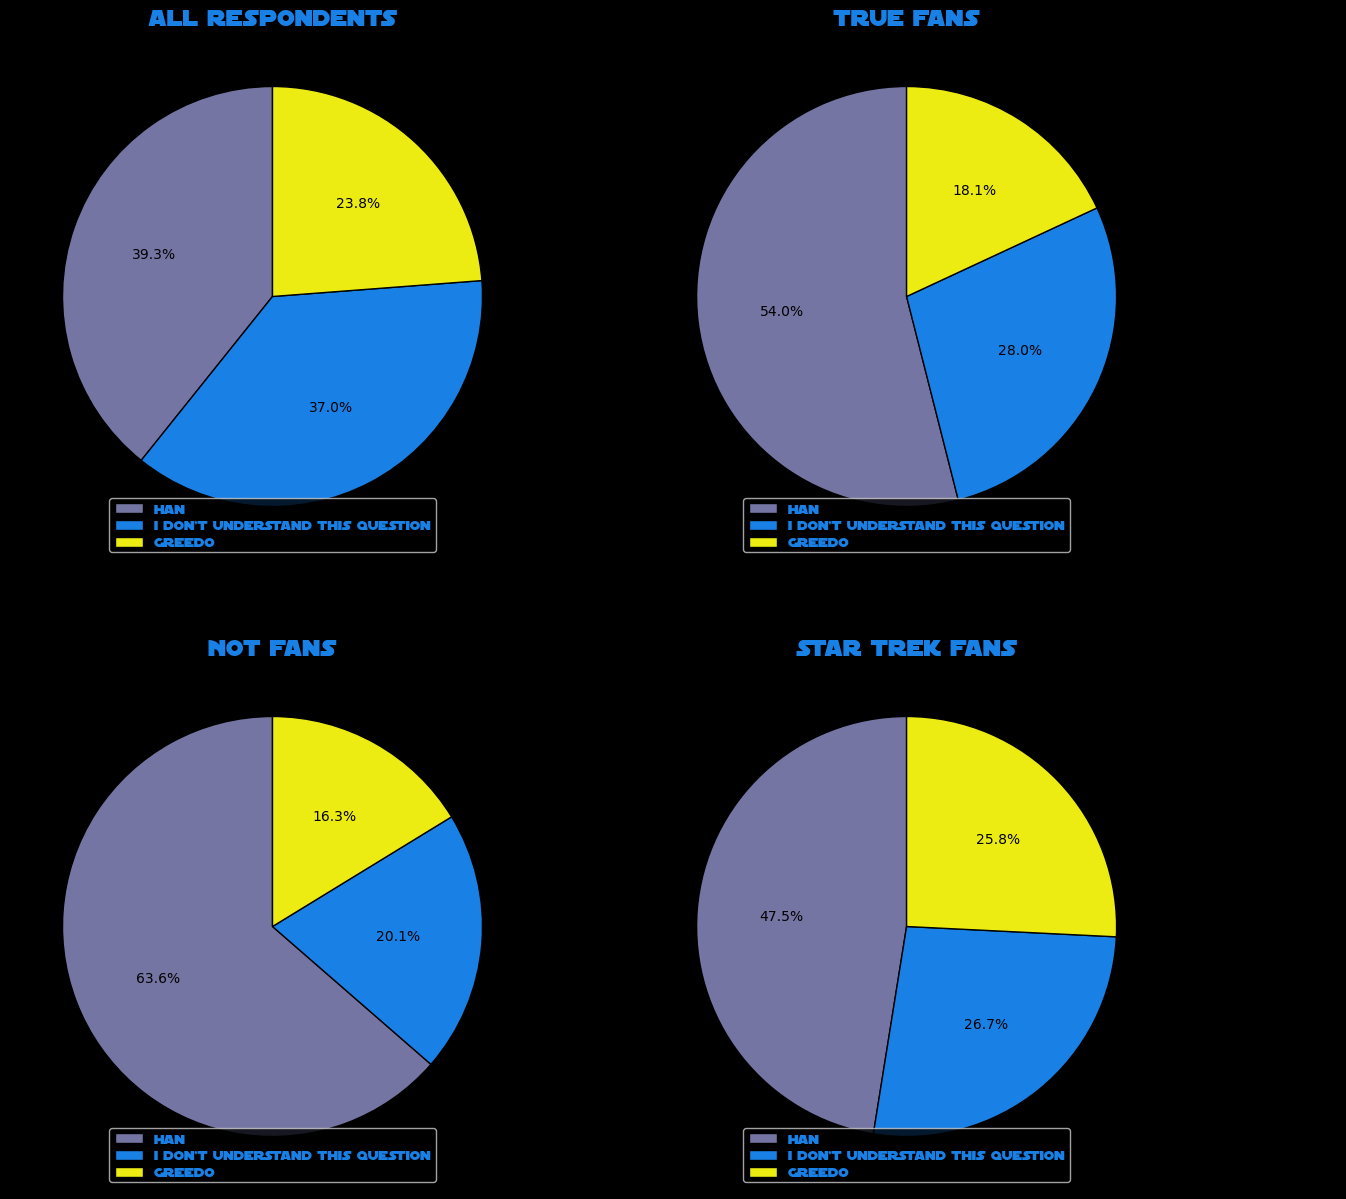

In [45]:
plt.figure(figsize=(15,15))
colors = ['#7575a3', '#1980e6', '#ecec13']

ax = plt.subplot(2,2,1)
values = list(star_wars['Which character shot first?'].value_counts())
plt.pie(values,  autopct='%1.1f%%', startangle=90, colors = colors, wedgeprops={'edgecolor' :'black'},
       textprops={'color':"black"}, labels = ['Han',"I don't understand this question",'Greedo'])
plt.legend(prop = 'SF Distant Galaxy', loc = 8, labelcolor='#1980e6')
plt.title('All respondents', fontfamily='SF Distant Galaxy', fontsize=17, color = '#1980e6')

ax = plt.subplot(2,2,2)
values = list(true_fans['Which character shot first?'].value_counts())
plt.pie(values,  autopct='%1.1f%%', startangle=90, colors = colors, wedgeprops={'edgecolor' :'black'},
       textprops={'color':"black"}, labels = ['Han',"I don't understand this question",'Greedo'])
plt.legend(prop = 'SF Distant Galaxy', loc = 8, labelcolor='#1980e6')
plt.title('True Fans', fontfamily='SF Distant Galaxy', fontsize=17, color = '#1980e6')

ax = plt.subplot(2,2,3)
values = list(not_fans['Which character shot first?'].value_counts())
plt.pie(values,  autopct='%1.1f%%', startangle=90, colors = colors, wedgeprops={'edgecolor' :'black'},
       textprops={'color':"black"}, labels = ['Han',"I don't understand this question",'Greedo'])
plt.legend(prop = 'SF Distant Galaxy', loc = 8, labelcolor='#1980e6')
plt.title('Not Fans', fontfamily='SF Distant Galaxy', fontsize=17, color = '#1980e6')

ax =plt.subplot(2,2,4)
values = list(star_trek_fans['Which character shot first?'].value_counts())
plt.pie(values,  autopct='%1.1f%%', startangle=90, colors = colors, wedgeprops={'edgecolor' :'black'},
       textprops={'color':"black"}, labels = ['Han',"I don't understand this question",'Greedo'])
plt.legend(prop = 'SF Distant Galaxy', loc = 8, labelcolor='#1980e6')
plt.title('Star Trek Fans', fontfamily='SF Distant Galaxy', fontsize=17, color = '#1980e6')

plt.show()

As we can see majority of true fans, as well as not fans think Han shot first. This applies to Star Trek fans. However, overall respondents almost as often did not understand the question, as opted for Han. 

<function matplotlib.pyplot.show(close=None, block=None)>

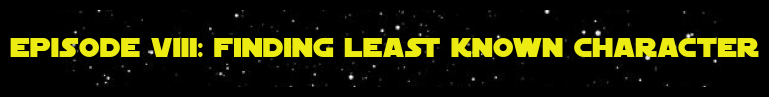

In [46]:
episode('Episode VIII: Finding Least Known Character')
plt.show

Survey questions related to respondent's attitude towards Star Wars characters contained 'Unfamiliar (N/A)' option. Let's explore which character of the saga is least known.  

In [47]:
unknown = star_wars.iloc[:, 15:29]

unknown_dict = {'Unfamiliar (N/A)': 1}
for column in unknown.columns:
    unknown[column] = unknown[column].map(unknown_dict)
    
unknown_sum = unknown.sum().sort_values(ascending=False).reset_index()
unknown_sum.rename(columns={0: 'Respondents'}, inplace=True) 
unknown_sum = unknown_sum.set_index('index', drop=True) # Resetting the index
unknown_sum

,Respondents
index,
Padme_Amidala,164.0
Emperor_Palpatine,156.0
Lando_Calrissian,148.0
Boba_Fett,132.0
Jar_Jar_Binks,109.0
Anakin_Skywalker,52.0
Obi_Wan_Kenobi,17.0
Han_Solo,15.0
C3P0,15.0


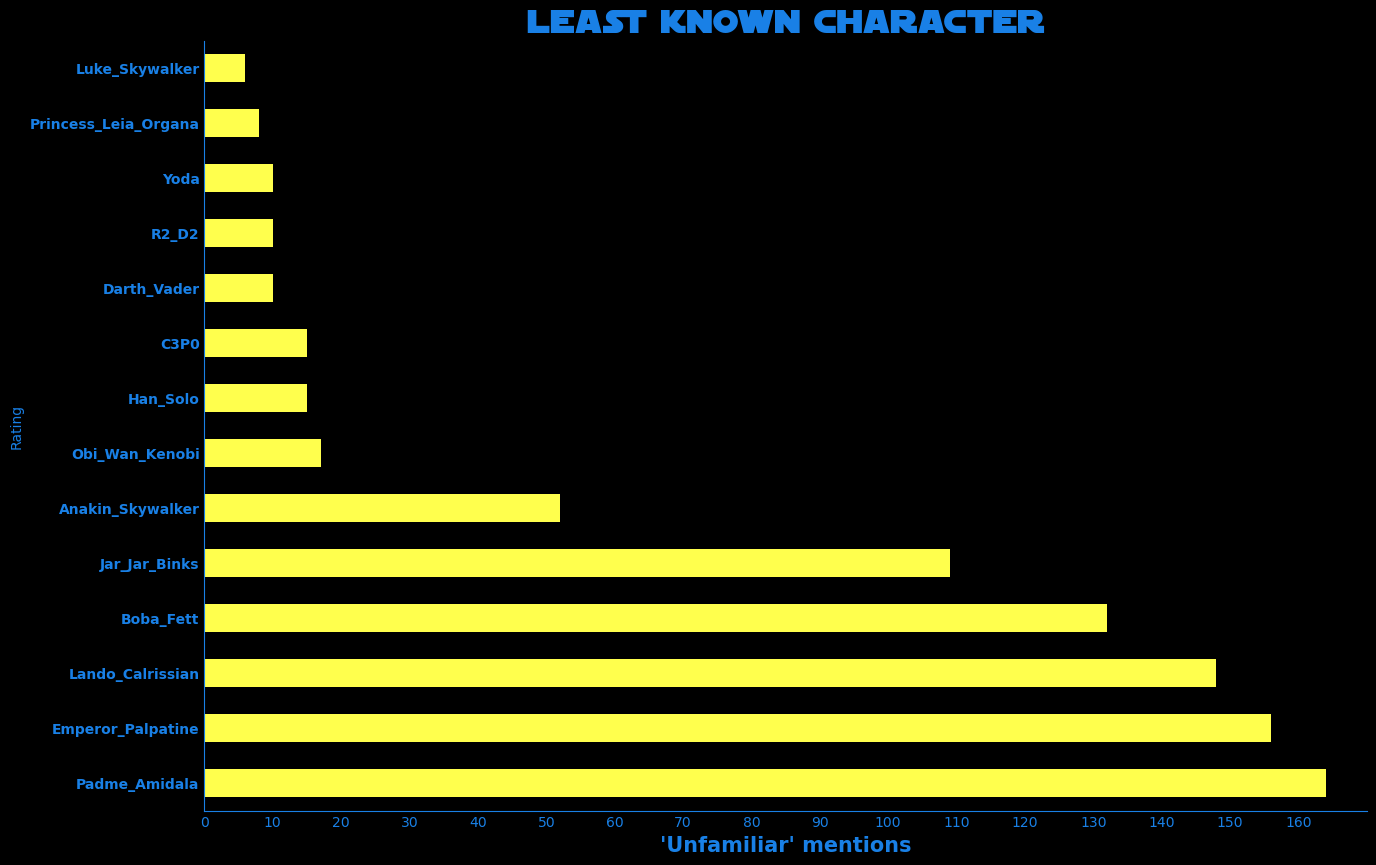

In [48]:
fig, ax = plt.subplots(figsize = (15, 10))
r = np.arange(14)
unknown_sum['Respondents'].sort_values(ascending=False).plot.barh(color = '#ffff4d')

ax.set_ylabel('Rating', color = '#1980e6')
ax.set_xlabel("'Unfamiliar' mentions", color = '#1980e6', fontsize= 15, weight = 'bold')
plt.xlim(0, 170)
plt.yticks(weight = 'bold')
plt.xticks(np.arange(0, 170, step=10), color = '#1980e6')

ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')

plt.tick_params(axis='both', which='both',length=0, colors='#1980e6')
plt.title('Least Known Character', fontfamily='SF Distant Galaxy', color = '#1980e6', fontsize=25)
plt.show()

As seen from the chart the least known character is Padme Amidala. One of the reasons could be the fact the she has only been introduced as the character in the prequel trilogy (Episodes I, II and III, 1999–2005). Other characters scored highly in the chart like Boba Fett or Lando Calrissian are not considered as main characters and do not feature in all episodes. Biggest surprise in Emperor Palpatine being second least known character, as he is one of the main villains and features throughout the saga. 

<function matplotlib.pyplot.show(close=None, block=None)>

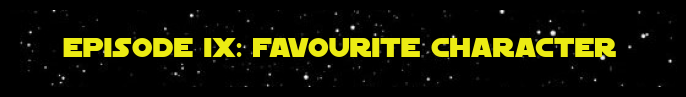

In [49]:
episode('Episode IX: Favourite Character')
plt.show

Now let's find out who is the favourite character among various groups of respondents. 

In [50]:
# Exploring columns related to the characters
star_wars[star_wars.columns[15:29]].head() 

,Han_Solo,Luke_Skywalker,Princess_Leia_Organa,Anakin_Skywalker,Obi_Wan_Kenobi,Emperor_Palpatine,Darth_Vader,Lando_Calrissian,Boba_Fett,C3P0,R2_D2,Jar_Jar_Binks,Padme_Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [51]:
star_wars.iloc[:,15].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han_Solo, dtype: int64

As we can see there are six possible responses in order to rate each character. Let's convert each response into numeric value as per below: 
- 'Very favorably': 5
- 'Somewhat favorably': 4,
- 'Neither favorably nor unfavorably (neutral)': 3,
- 'Somewhat unfavorably': 2,
- 'Very unfavorably': 1
- 'Unfamiliar (N/A)': 0
Please note that 'Unfamiliar (N/A)' response has 0 value, as not being familiar with the character should not affect its overall rating. 

In [52]:
answers = {'Very favorably': 5, 
           'Somewhat favorably': 4,
           'Neither favorably nor unfavorably (neutral)': 3, 
           'Somewhat unfavorably': 2, 
           'Very unfavorably': 1,
           'Unfamiliar (N/A)': 0,
           np.NaN: False}
for x in star_wars.columns[15:29]:
    star_wars[x] = star_wars[x].map(answers)
    
star_wars[star_wars.columns[15:29]].head(10) # verifying results

,Han_Solo,Luke_Skywalker,Princess_Leia_Organa,Anakin_Skywalker,Obi_Wan_Kenobi,Emperor_Palpatine,Darth_Vader,Lando_Calrissian,Boba_Fett,C3P0,R2_D2,Jar_Jar_Binks,Padme_Amidala,Yoda
1,5,5,5,5,5,5,5,0,0,5,5,5,5,5
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,4,4,4,4,0,0,0,0,0,0,0,0,0
4,5,5,5,5,5,4,5,4,2,5,5,5,5,5
5,5,4,4,2,5,1,4,3,5,4,4,1,4,4
6,5,5,5,5,5,3,5,3,4,4,4,4,3,5
7,5,5,4,4,5,5,5,5,5,4,5,2,4,5
8,5,4,5,3,5,1,2,3,4,4,4,1,2,5
9,5,2,4,4,4,5,5,5,5,3,4,1,2,4
10,3,5,5,5,5,2,5,2,2,5,5,5,2,5


In [53]:
star_wars.iloc[:,15:29] = star_wars.iloc[:,15:29].astype(float) # converting values to floats

In [54]:
star_wars[star_wars.columns[15:29]].dtypes # inspecting results

Han_Solo                float64
Luke_Skywalker          float64
Princess_Leia_Organa    float64
Anakin_Skywalker        float64
Obi_Wan_Kenobi          float64
Emperor_Palpatine       float64
Darth_Vader             float64
Lando_Calrissian        float64
Boba_Fett               float64
C3P0                    float64
R2_D2                   float64
Jar_Jar_Binks           float64
Padme_Amidala           float64
Yoda                    float64
dtype: object

Let's apply the same conversion as above to true fans, not fans and Star Trek fans. 

In [55]:
answers = {'Very favorably': 5, 
           'Somewhat favorably': 4,
           'Neither favorably nor unfavorably (neutral)': 3,
           'Somewhat unfavorably': 2, 
           'Very unfavorably': 1,
           'Unfamiliar (N/A)': 0,
            np.NaN: False}
for x in true_fans.iloc[:,15:29]:
    true_fans[x] = true_fans[x].map(answers)
    
true_fans.iloc[:,15:29] = true_fans.iloc[:,15:29].astype(float)

In [56]:
answers = {'Very favorably': 5, 
           'Somewhat favorably': 4,
           'Neither favorably nor unfavorably (neutral)': 3,
           'Somewhat unfavorably': 2, 
           'Very unfavorably': 1,
           'Unfamiliar (N/A)': 0,
            np.NaN: False}
for x in true_fans.iloc[:,15:29]:
    not_fans[x] = not_fans[x].map(answers)
    
not_fans.iloc[:,15:29] = not_fans.iloc[:,15:29].astype(float)

In [57]:
answers = {'Very favorably': 5, 
           'Somewhat favorably': 4,
           'Neither favorably nor unfavorably (neutral)': 3,
           'Somewhat unfavorably': 2, 
           'Very unfavorably': 1,
           'Unfamiliar (N/A)': 0,
            np.NaN: False}
for x in star_trek_fans.iloc[:,15:29]:
    star_trek_fans[x] = star_trek_fans[x].map(answers)
    
star_trek_fans.iloc[:,15:29] = star_trek_fans.iloc[:,15:29].astype(float)

Now let's visualize the results of the mean rating on bar charts.

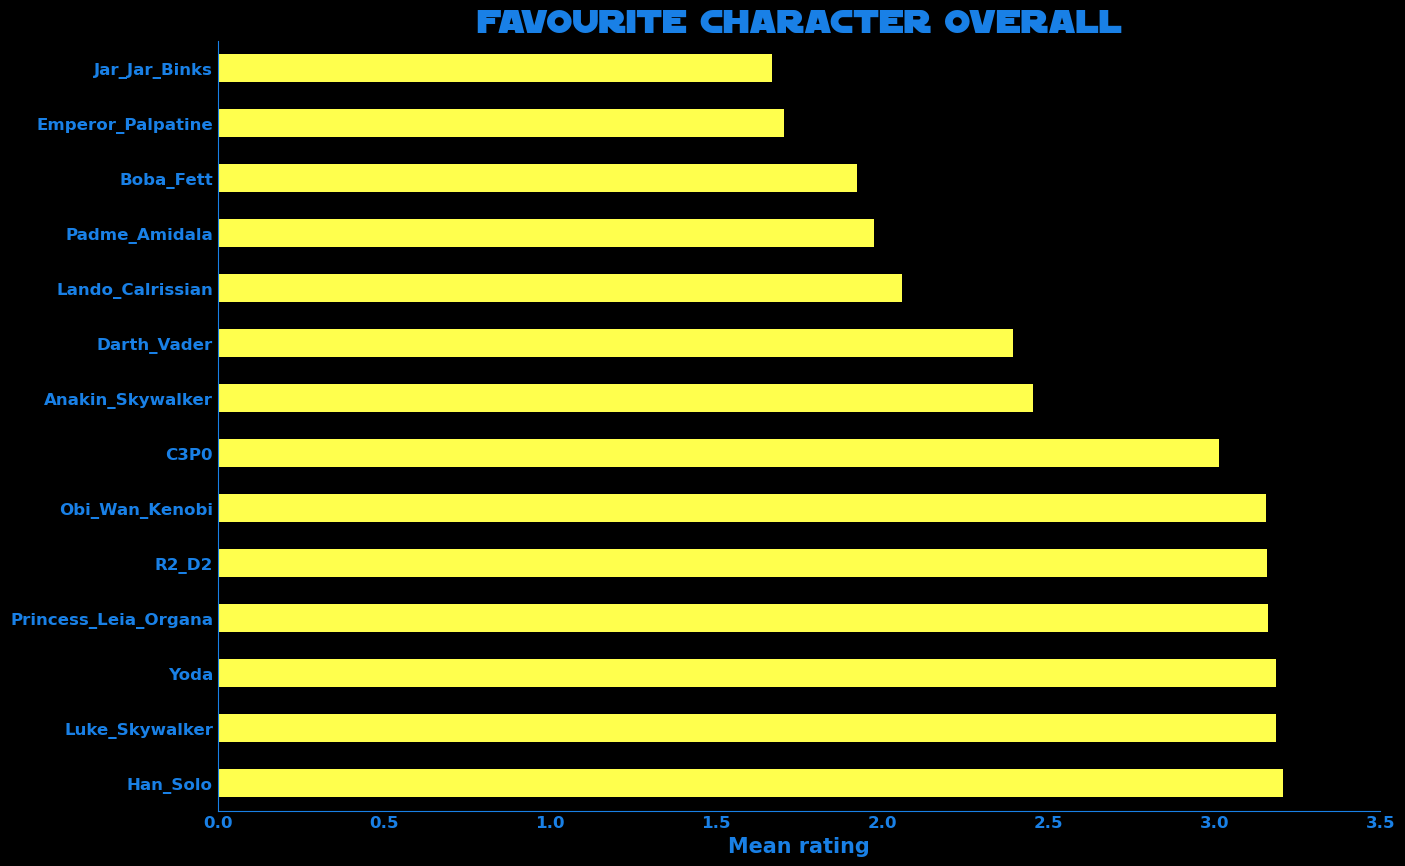

In [58]:
fig, ax = plt.subplots(figsize = (15, 10))
star_wars[star_wars.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#ffff4d')

plt.xlim(0,3.5)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 15, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 12)
plt.title('Favourite Character Overall', fontfamily='SF Distant Galaxy', fontsize=25, color = '#1980e6')

plt.show()

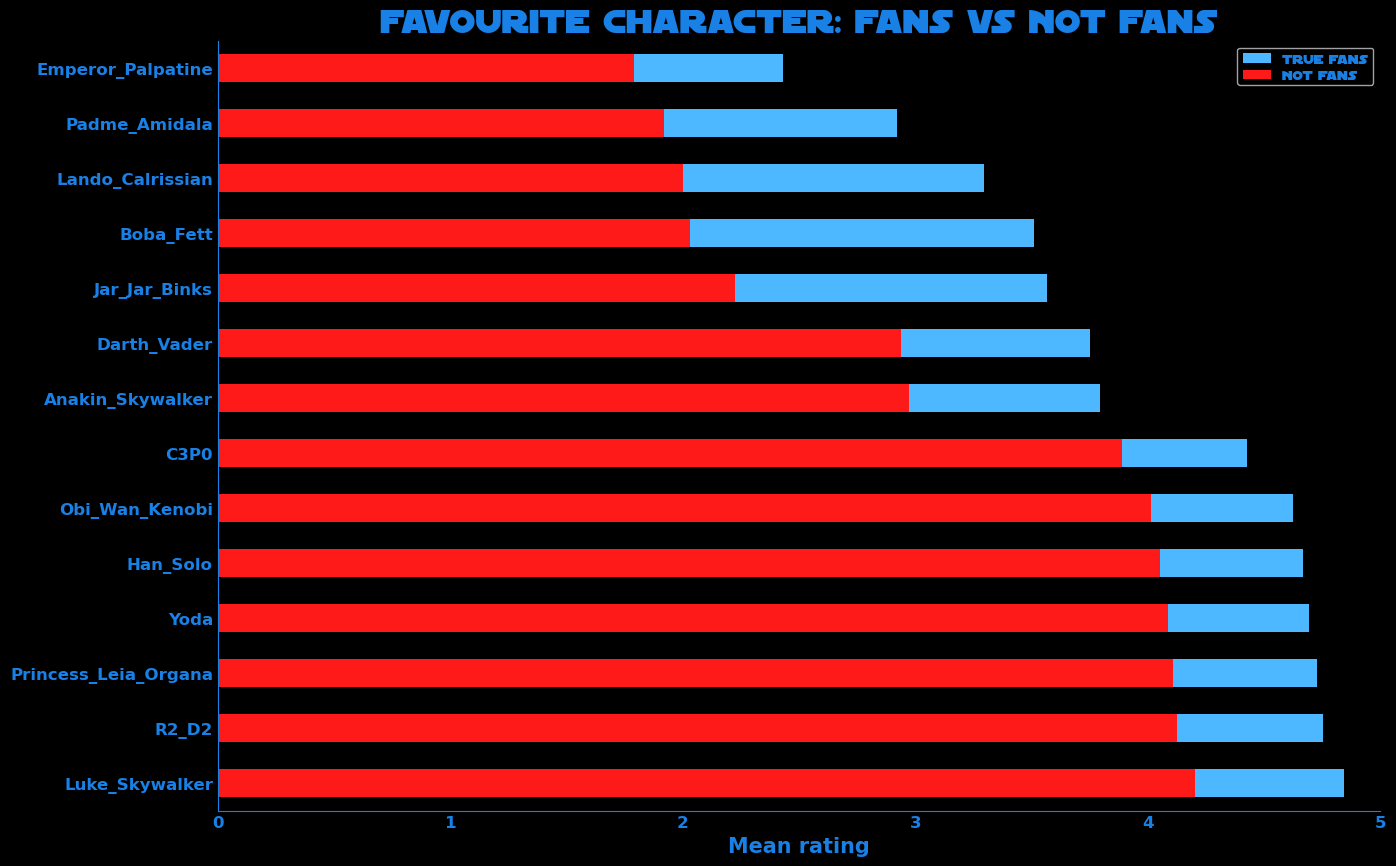

In [59]:
fig, ax = plt.subplots(figsize = (15, 10))
true_fans[true_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#4db8ff', label ='True Fans')
not_fans[not_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#ff1a1a', label = 'Not Fans')

plt.xlim(0, 5)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 15, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 12)
plt.title('Favourite Character: Fans vs Not Fans', fontfamily='SF Distant Galaxy', fontsize=25, color = '#1980e6')
plt.legend(loc = 1, prop = 'SF Distant Galaxy',labelcolor='#1980e6')

plt.show()

In [60]:
female_star_wars = star_wars[star_wars['Gender'] == 'Female']
male_star_wars = star_wars[star_wars['Gender'] == 'Male']

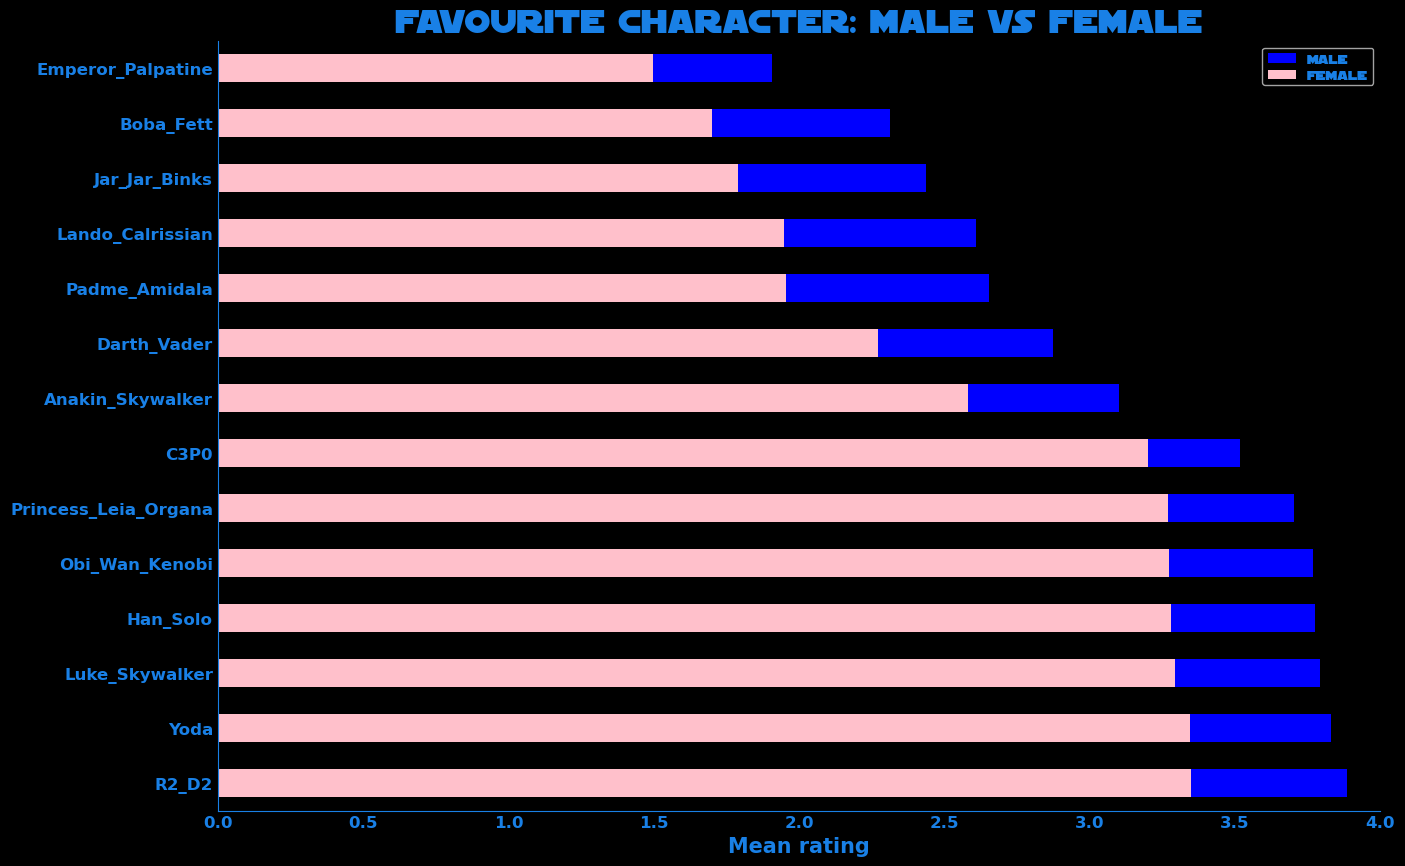

In [61]:
fig, ax = plt.subplots(figsize = (15, 10))
male_star_wars[male_star_wars.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = 'blue', label = 'Male')
female_star_wars[female_star_wars.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = 'pink', label = 'Female')

plt.xlim(0, 4)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 15, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 12)
plt.title('Favourite Character: Male vs Female', fontfamily='SF Distant Galaxy', fontsize=25, color = '#1980e6')
plt.legend(loc = 1, prop = 'SF Distant Galaxy', labelcolor='#1980e6')

plt.show()

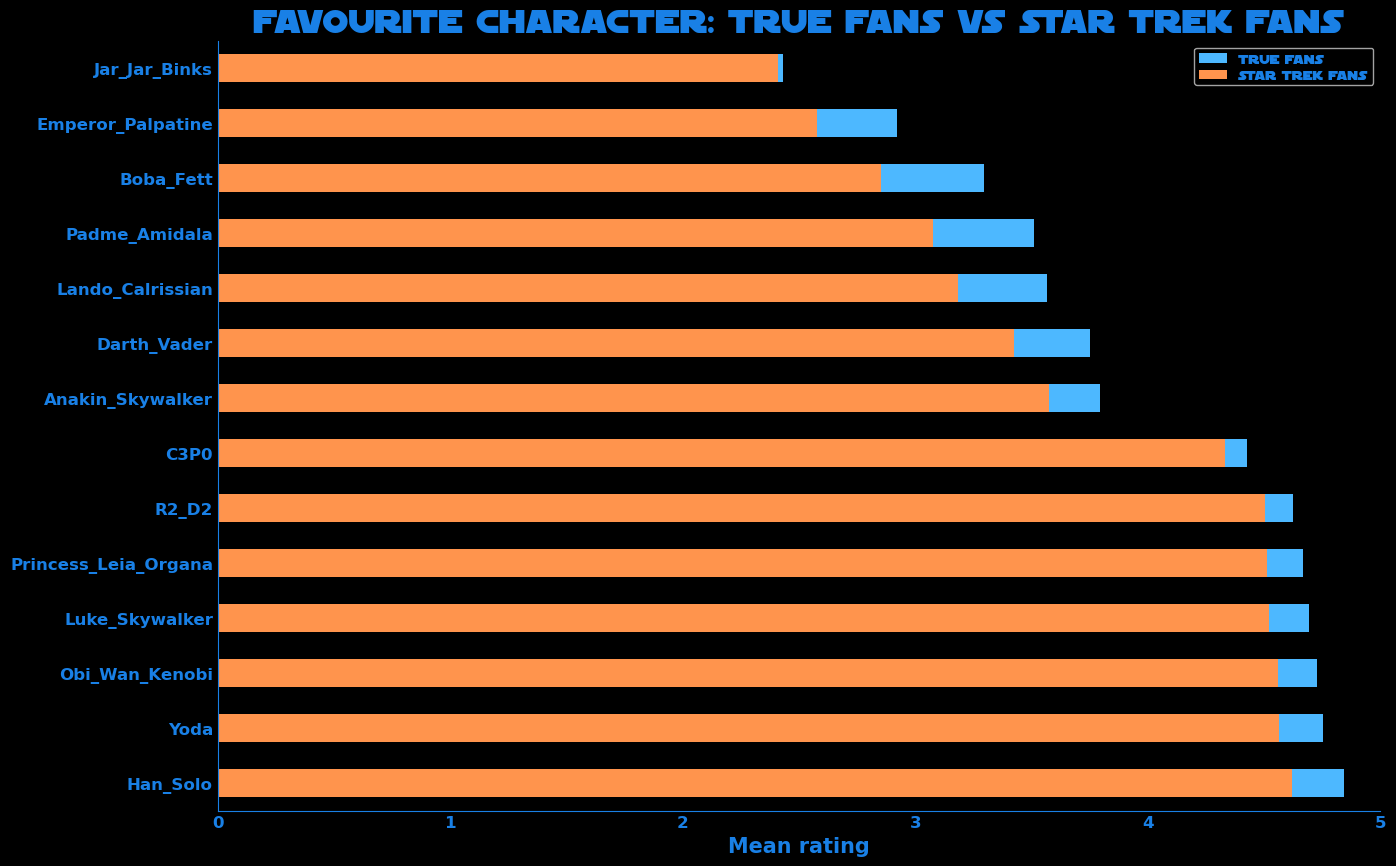

In [62]:
fig, ax = plt.subplots(figsize = (15, 10))
true_fans[true_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#4db8ff', label ='True Fans')
star_trek_fans[star_trek_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#ff944d', label = 'Star Trek Fans')

plt.xlim(0, 5)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 15, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 12)
plt.legend(loc = 1, prop = 'SF Distant Galaxy', labelcolor='#1980e6')
plt.title('Favourite Character: True Fans vs Star Trek Fans', fontfamily='SF Distant Galaxy', fontsize=25, color = '#1980e6')

plt.show()

Now we should plot all four of the above charts on a single plot for easier comparison and analysis. 

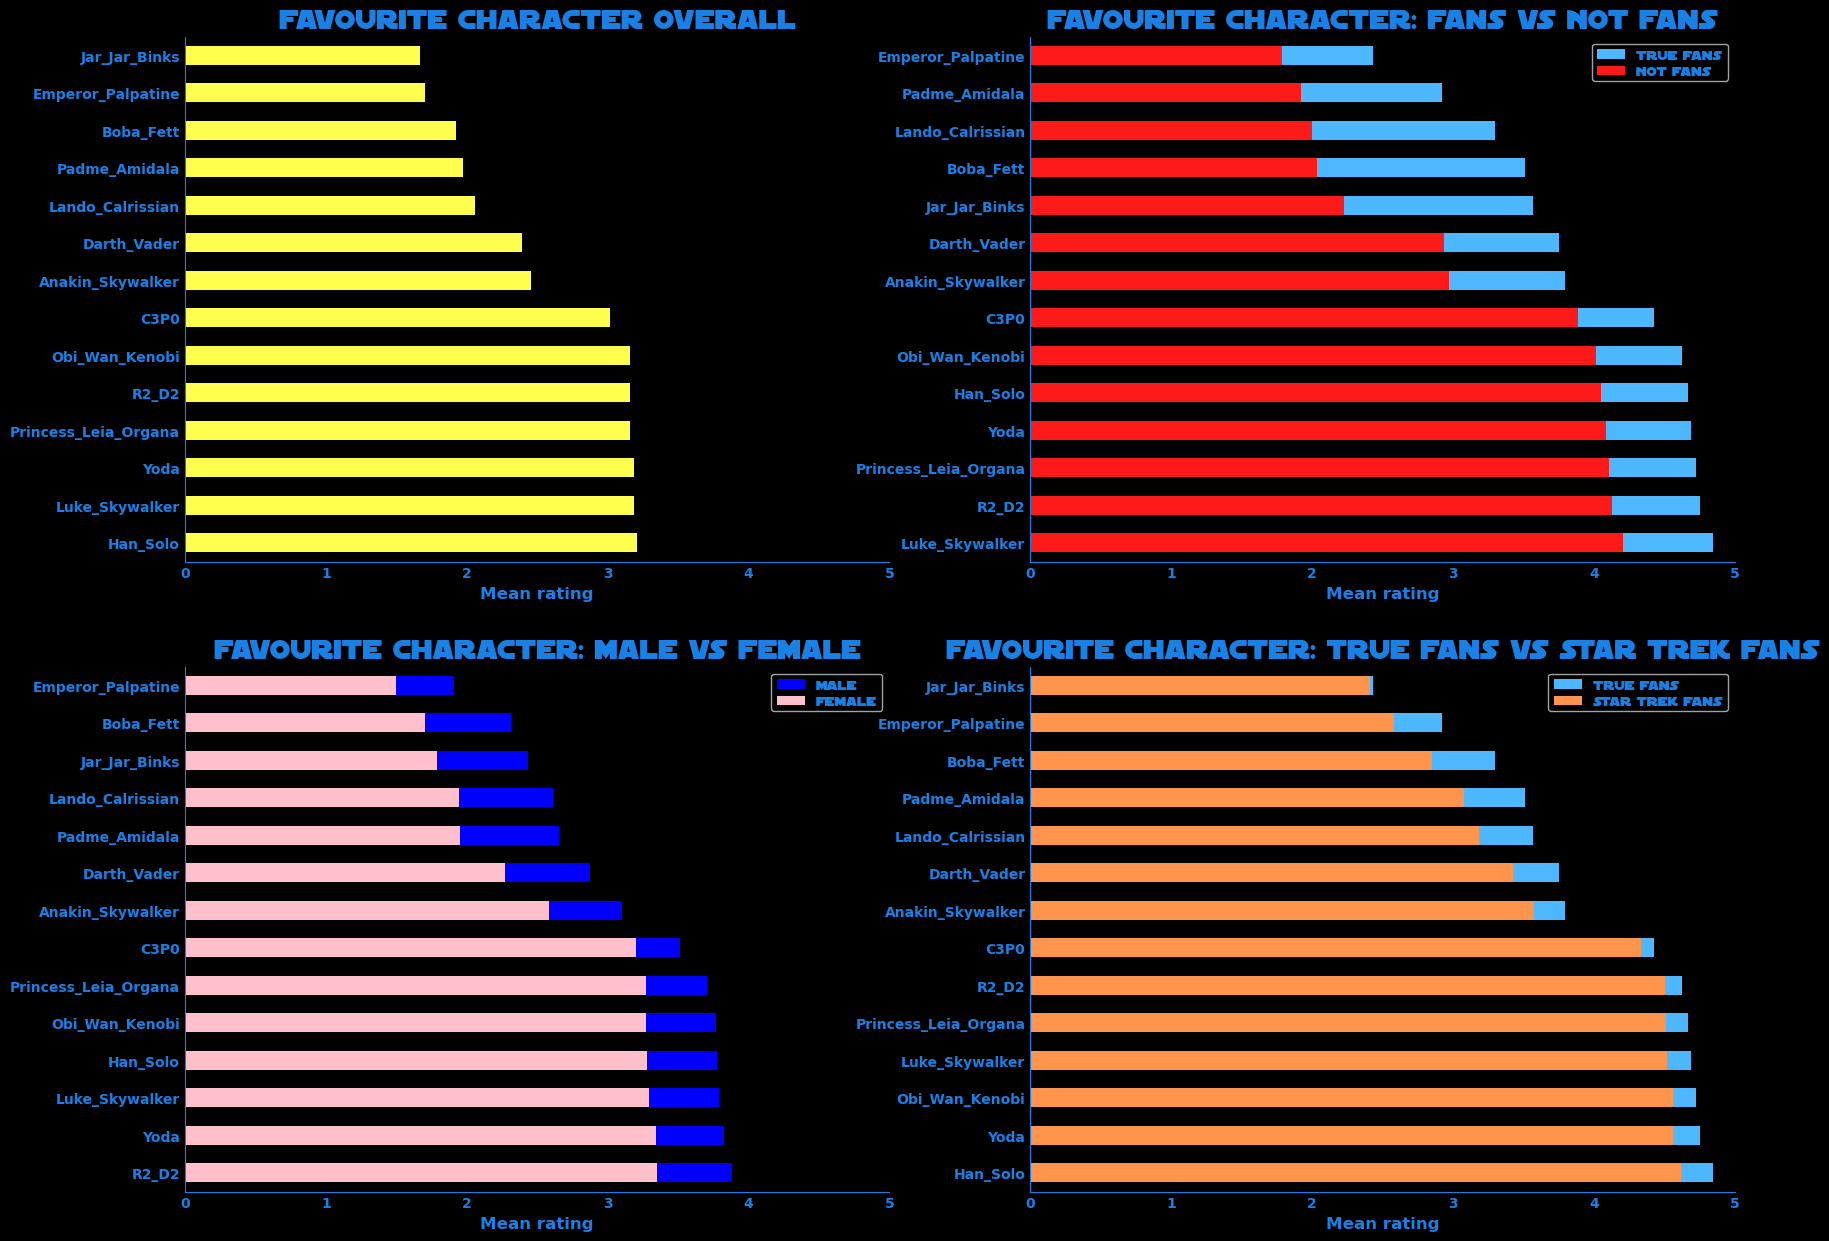

In [63]:
plt.figure(figsize=(20,15))
plt.style.use('dark_background')

ax = plt.subplot(2,2,1)
star_wars[star_wars.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#ffff4d')
plt.xlim(0,5)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 10)
plt.title('Favourite Character Overall', fontfamily='SF Distant Galaxy', fontsize=20, color = '#1980e6')

ax = plt.subplot(2,2,2)
true_fans[true_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#4db8ff', label ='True Fans')
not_fans[not_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#ff1a1a', label = 'Not Fans')
plt.xlim(0, 5)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 10)
plt.title('Favourite Character: Fans vs Not Fans', fontfamily='SF Distant Galaxy', fontsize=20, color = '#1980e6')
plt.legend(loc = 1, prop = 'SF Distant Galaxy',labelcolor='#1980e6')

ax = plt.subplot(2,2,3)
male_star_wars[male_star_wars.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = 'blue', label = 'Male')
female_star_wars[female_star_wars.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = 'pink', label = 'Female')
plt.xlim(0, 5)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 10)
plt.title('Favourite Character: Male vs Female', fontfamily='SF Distant Galaxy', fontsize=20, color = '#1980e6')
plt.legend(loc = 1, prop = 'SF Distant Galaxy',labelcolor='#1980e6')

ax = plt.subplot(2,2,4)
true_fans[true_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#4db8ff', label ='True Fans')
star_trek_fans[star_trek_fans.columns[15:29]].mean().sort_values(ascending=False).plot.barh(color = '#ff944d', label = 'Star Trek Fans')
plt.xlim(0, 5)
ax.set_xlabel('Mean rating', color = '#1980e6', fontsize= 12, weight = 'bold')
ax.spines.right.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines.left.set(color = '#1980e6')
ax.spines.bottom.set(color = '#1980e6')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.tick_params(axis='both', which='both',length=0, colors='#1980e6', labelsize = 10)
plt.legend(loc = 1, prop = 'SF Distant Galaxy',labelcolor='#1980e6')
plt.title('Favourite Character: True Fans vs Star Trek Fans', fontfamily='SF Distant Galaxy', fontsize=20, color = '#1980e6')

plt.show()

#### Overall results
The results are very mixed indeed. Han Solo is the most popular in overall rating, very closely followed by Luke Skywalker, Yoda, Princess Leia, R2-D2 and Obi Wan Kenobi. Two least favourite characters however are Jar Jar Binks and Emperor Palpatine. This is very interesting bearing in mind that Jar Jar Binks is a positive character (or at least neutral), where we would normally expect negative characters being least favourite.

#### Fans vs Not fans

Here Luke Skywalker is the favourite among both sets. Han Solo is being only fifth favourite, which may seem peculiar. Emperor Palpatine however is the least favourite by far. Worth mentioning Padme Amidala being second least favourite among these groups categories. Once again she is a positive character. It may correlate with the fact that she is least known character as well. 

#### Male vs Female
R2-D2 is the favourite male character very closely followed by Yoda. Same applies for female respondents. Emperor Palpatine once again is out of favour  with both genders.

#### True fans vs Star Trek fans
Hans Solo, Yoda and Obi Wan Kenobi are favourites in both groups. Once again worth mentioning an interesting observation that Jar Jar Binks being least favourite by far. 


We can conclude that top favourite characters by far are Han Solo, Luke Skywalker, Yoda, Princess Leia, Obi Wan and R2-D2. With Emperor Palpatine and Jar Jar Binks being least favourites. Based on the above, we can speculate that the viewers do not only dislike simply negative characters. Probably some positive heroes can also produce negative emotions.   

## Conclusion

In this project we have managed to analyze the data provided by the survey and established various visually represented results, including highest ranked episode, most viewed episode, least known characters, most and least favourite characters, explored binary segments of the survey and finally investigated how do the respondents answer the question: who shot first, Han Solo or Greedo?...